## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [73]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [74]:
a=-2;b=1
x=np.linspace(0,20)
x=x.reshape((x.shape[0]),1)
y=((a*x)+b).reshape((x.shape[0]),1)

In [75]:
len(x)

50

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [76]:
alpha=0.0001
max_iterations=500

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = np.zeros((1,))
    return w, b

def h(w,b,x):
    y_pred = np.dot(x,w) + b
    return y_pred

def cost(w, b, x, y,y_pred ):
    m= x.shape[0]
    j= np.sum((y_pred-y)**2)/(2*m)
    return j

def gradient(x, y,y_pred ):
    m = x.shape[0]
    res = y_pred- y
    dw = 1/m * np.dot(x.T,res)
    db = 1/m * np.sum(res)
    return dw,db

def update_parameters(w,b,dw,db,alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return w,b

def model(x,y):
    loss = []
    w_list=[]
    b_list=[]
    y_pred_list=[]

    w,b = initialize_with_zeros(x.shape[1])
    for i in range(max_iterations) :
        y_pred=h(w,b,x)
        j = cost(w,b, x, y,y_pred )
        loss.append(j)
        dw, db = gradient(x, y,y_pred)
        w,b = update_parameters(w,b , dw,db,  alpha)
        w_list.append(w)
        b_list.append(b)
        plt.plot(x,y_pred)

        
    return w,b,loss,w_list,b_list



#### Try your function with any input parameterss of your choice.

w,b [[-1.91400736]] [-0.12775146]


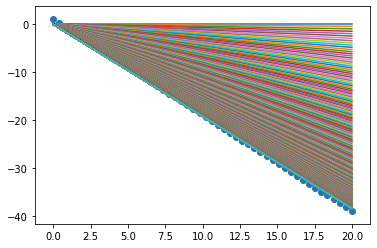

In [77]:
w,b,loss,w_list,b_list = model(x,y)
print("w,b",w,b)
plt.scatter(x, y)




#### Calculate r2 score

In [78]:

def my_r2_score(y,y_pred):
    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2_score = 1 - (ssr/sst)
    return r2_score

In [79]:

r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)

my r2 score 0.9976344366134113


#### Plot loss vs. epochs

Text(0, 0.5, 'Loss')

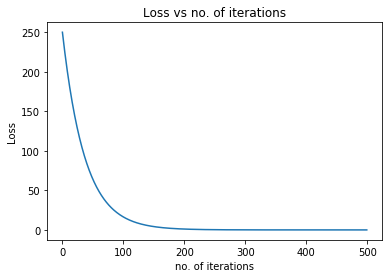

In [80]:
#loss vs epochs
fig2 = plt.figure(2)
plt.plot(loss)
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'Loss')

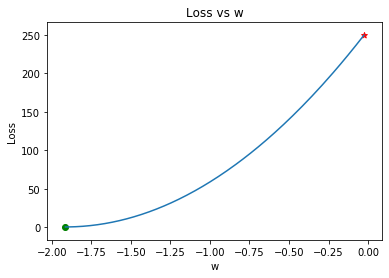

In [81]:
#Loss vs w
fig3 = plt.figure(2)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

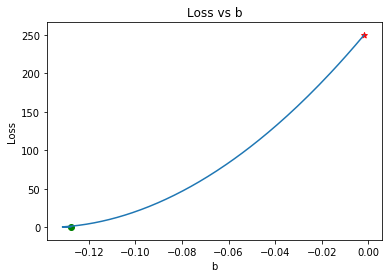

In [82]:
#Loss vs b
#fig3 = plt.figure(2)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#### Plot all regression lines till converge

already done in the model function

#### Plot the best regression line

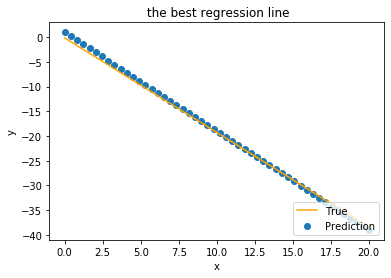

In [83]:
#best regression line
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
fig1 = plt.figure(1)
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

w,b [[-1.9934434]] [0.91185457]


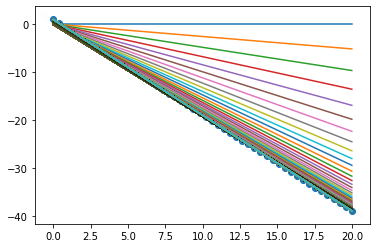

In [84]:
alpha=0.001
max_iterations=10000
w,b,loss,w_list,b_list = model(x,y)
print("w,b",w,b)
plt.scatter(x, y)

w,b [[-1.93422646]] [0.1157556]


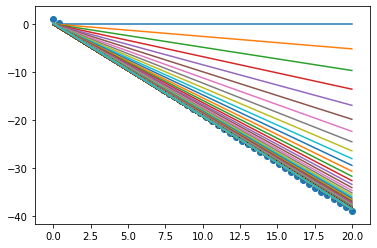

In [85]:
alpha=0.001
max_iterations=1000
w,b,loss,w_list,b_list = model(x,y)
print("w,b",w,b)
plt.scatter(x, y)

Text(0, 0.5, 'Loss')

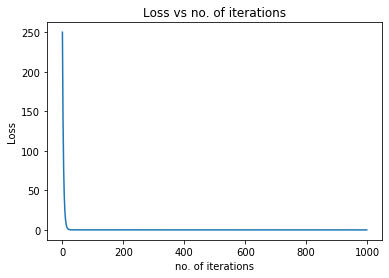

In [86]:
#loss vs epochs
fig2 = plt.figure(2)
plt.plot(loss)
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

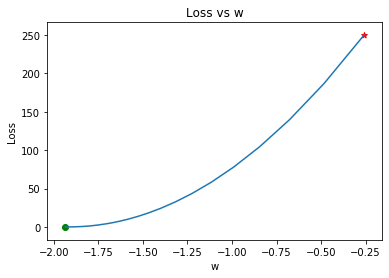

In [87]:
#Loss vs w
fig3 = plt.figure(2)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')

plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

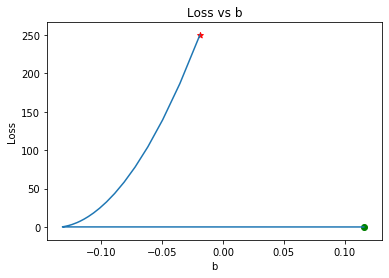

In [88]:
#Loss vs b
#fig3 = plt.figure(2)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

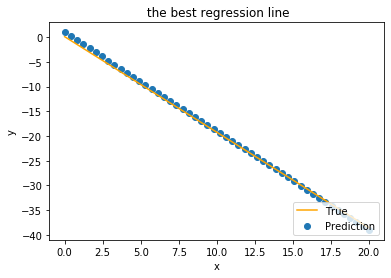

In [89]:
#best regression line

plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
fig1 = plt.figure(1)
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [90]:


def create_mini_batches(x,y,batch_size):
    mini_batches = []
    data = np.hstack((x, y))
    np.random.shuffle(data)
    n_minibatches = x.shape[0] // batch_size

    for i in range(n_minibatches ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        x_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((x_mini, y_mini))
        
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        x_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((x_mini, y_mini))
    
    return mini_batches

def mini_batches_GD(x,y,batch_size):
    loss = []
    w_list=[]
    b_list=[]
    w,b = initialize_with_zeros(x.shape[1])
    mini_batches = create_mini_batches(x, y, batch_size)

    for i in range(max_iterations):
        for mini_batch in mini_batches:
            x_mini, y_mini = mini_batch
            y_pred=h(w,b,x_mini)
            j = cost(w,b,x_mini, y_mini,y_pred )
            loss.append(j)
            dw, db = gradient(x_mini, y_mini,y_pred)
            w,b = update_parameters(w,b , dw,db,  alpha)
            w_list.append(w)
            b_list.append(b)
   

    return w,b,loss,w_list,b_list

w,b [[-1.9765298]] [0.68377226]
my r2 score 0.9998143939206263


Text(0, 0.5, 'Loss')

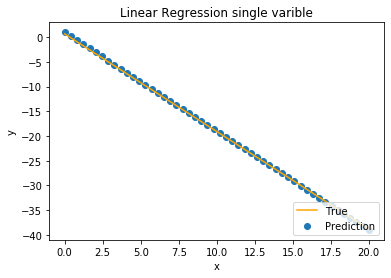

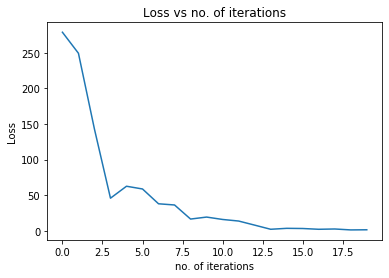

In [91]:
#implenenting mini_batch

batch_size=5
alpha=0.001
max_iterations=500
w,b,loss,w_list,b_list= mini_batches_GD(x,y,batch_size)
print("w,b",w,b)


r=my_r2_score(y, h(w,b,x))
print("my r2 score",r)


plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
fig1 = plt.figure(1)
plt.title("Linear Regression single varible")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

fig2 = plt.figure(2)
plt.plot(loss[0:20])
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'Loss')

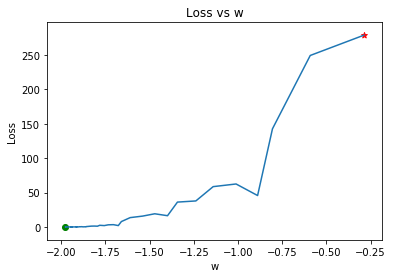

In [92]:
#Loss vs w
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

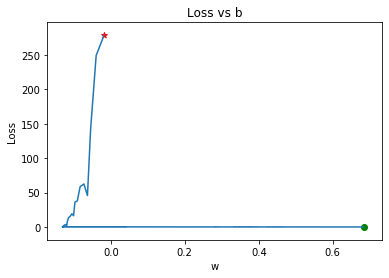

In [93]:
#Loss vs b
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("w")
plt.ylabel("Loss")

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [94]:
def cost_stochastic(w, b, x, y,y_pred ):
    j=((y_pred-y)**2)/(2)
    return j

def stochastic_GD(x,y,m):
    loss = []
    w_list=[]
    b_list=[]
    w,b = initialize_with_zeros(x.shape[1])
    for i in range(max_iterations) :
        for n in range(0, m):
            y_pred=h(w,b,x[n,:])
            j = cost_stochastic(w,b, x[n,:], y[n],y_pred )
            loss.append(j)
            dw, db = gradient(x[n,:], y[n],y_pred)
            w,b = update_parameters(w,b , dw,db,  alpha)
            w_list.append(w)
            b_list.append(b)
    return w,b,loss,w_list,b_list



[[-2.]] [1.]


Text(0, 0.5, 'Loss')

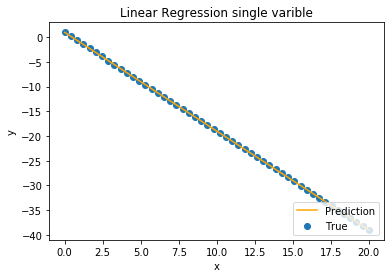

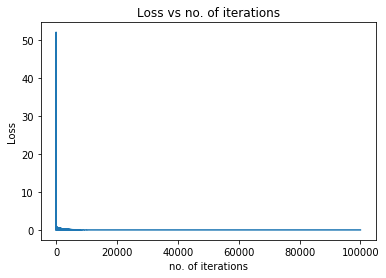

In [95]:
alpha=0.001

max_iterations=2000
w,b,loss,w_list,b_list=stochastic_GD(x,y,x.shape[0])
print(w,b)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
fig1 = plt.figure(1)
plt.title("Linear Regression single varible")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Prediction","True"], loc ="lower right")

fig2 = plt.figure(2)
plt.plot(loss)
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

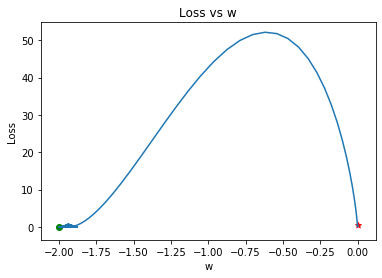

In [96]:
#Loss vs w
fig3 = plt.figure(2)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

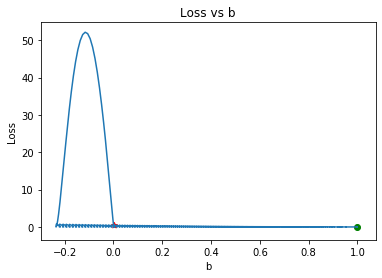

In [97]:
#Loss vs b
#fig3 = plt.figure(2)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")